# Investment Analysis Assignment

Import the required libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
import re # re is used for find and replace operations
import seaborn as sns

In [2]:
companies = pd.read_csv("companies.csv", encoding="cp437")
rounds2 = pd.read_csv("rounds2.csv", encoding="cp437")

# Checkpoint 1: Data Cleaning 1

## Step 1: Data cleaning

There are a few cell which do not have a the raised amount. This data is meaningless as we are making our investment decision based on the invested amount, hence we are filtering out this data.

In [3]:
rounds2 = rounds2[~rounds2["raised_amount_usd"].isnull()]

It's prefered to express the amout raised in millions to make the numbers readable

In [4]:
rounds2["raised_amount_usd_in_millions"] = rounds2["raised_amount_usd"]/1000000

Drop the columns that we do not need

In [5]:
rounds2.drop(["funding_round_code", "funded_at", "raised_amount_usd"], axis = 1, inplace=True)
companies.drop(["homepage_url", "status", "state_code", "region", "city", "founded_at"], axis = 1, inplace=True)

In [6]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_permalink              94959 non-null  object 
 1   funding_round_permalink        94959 non-null  object 
 2   funding_round_type             94959 non-null  object 
 3   raised_amount_usd_in_millions  94959 non-null  float64
dtypes: float64(1), object(3)
memory usage: 3.6+ MB


In [7]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   category_list  63220 non-null  object
 3   country_code   59410 non-null  object
dtypes: object(4)
memory usage: 2.0+ MB


Filter out the companies whos country_code is missing

In [8]:
companies = companies[~companies["country_code"].isnull()]

###### How many unique companies are present in rounds2?	

In [9]:
len(rounds2["company_permalink"].str.upper().unique())

53917

###### How many unique companies are present in companies?	

In [10]:
len(companies["permalink"].str.upper().unique())

59410

###### Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [11]:
companies["permalink"] = companies["permalink"].str.upper().apply(lambda x: x.strip())
rounds2["company_permalink"] = rounds2["company_permalink"].str.upper().apply(lambda x: x.strip())

master_frame = pd.merge(left=companies, right=rounds2, left_on="permalink", right_on="company_permalink", how="inner")
master_frame.to_csv("master_frame.csv")
master_frame.shape[0]

89095

###### Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

In [12]:
na = pd.merge(left=rounds2, right=companies, right_on="permalink", left_on="company_permalink", how="left")
na[na.permalink.isnull()]

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd_in_millions,permalink,name,category_list,country_code
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,3.406878,NaN,NaN,NaN,NaN
26,/ORGANIZATION/1000CHI,/funding-round/854fae13c5b26b2ea6b32b06c2e5890c,angel,43.923865,NaN,NaN,NaN,NaN
52,/ORGANIZATION/10K-2,/funding-round/95401c8e8336892bf375ad94efd6c725,seed,0.100000,NaN,NaN,NaN,NaN
72,/ORGANIZATION/1234ENTER,/funding-round/6343322ed785252d4c5ada444fa7d8e4,venture,0.150267,NaN,NaN,NaN,NaN
73,/ORGANIZATION/1234ENTER,/funding-round/ee6f9dea78c9a0697a500098a854564d,seed,0.500000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
94797,/ORGANIZATION/ZUGGI,/funding-round/e8fa50bcf4086dc88c07a901258b8b4f,seed,0.040000,NaN,NaN,NaN,NaN
94862,/ORGANIZATION/ZUUMTEL,/funding-round/785ed8667f9d950257f94089050d6eb0,angel,0.200000,NaN,NaN,NaN,NaN
94863,/ORGANIZATION/ZUUMTEL,/funding-round/d5d97d7c8a5e923715b15495d44e7cb8,seed,0.100000,NaN,NaN,NaN,NaN
94875,"/ORGANIZATION/ZWAYO-""ON-DEMAND-VALET-PARKING""",/funding-round/eb5163bb6feea4384121e27699bb7b25,seed,0.060000,NaN,NaN,NaN,NaN


After we've merged the data take a copy of master_frame. This will come in handy later.

In [13]:
original_data = master_frame.copy()


# Checkpoint 2: Funding Type Analysis

###### Representative funding amount of venture type

In [14]:
master_frame[master_frame["funding_round_type"]=="venture"]["raised_amount_usd_in_millions"].median()

5.0

###### Representative funding amount of angel type

In [15]:
master_frame[master_frame["funding_round_type"]=="angel"]["raised_amount_usd_in_millions"].median()

0.410737

###### Representative funding amount of seed type

In [16]:
master_frame[master_frame["funding_round_type"]=="seed"]["raised_amount_usd_in_millions"].median()

0.3

###### Representative funding amount of private equity type

In [17]:
master_frame[master_frame["funding_round_type"]=="private_equity"]["raised_amount_usd_in_millions"].median()

20.0

Filtering the data to include only venture type funding

In [18]:
master_frame = master_frame[master_frame["funding_round_type"]=="venture"]

# Checkpoint 3: Country Analysis

In [19]:
top9 = original_data.groupby(by=["country_code"])["raised_amount_usd_in_millions"].sum().sort_values(ascending=False)[0:9].reset_index()
top9.country_code



0    USA
1    CHN
2    GBR
3    IND
4    CAN
5    RUS
6    DEU
7    ISR
8    FRA
Name: country_code, dtype: object


Filter by the top 3 english speaking countries

In [20]:
master_frame = master_frame[master_frame["country_code"].isin(["USA","GBR","IND"])]

# Checkpoint 4: Sector Analysis 1

Extract the primary sector of each category list from the category_list column

In [21]:
master_frame["primary_sector"] = master_frame["category_list"].apply(lambda x : str(x).split("|")[0])

Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [22]:
mapping = pd.read_csv("mapping.csv", encoding="cp437")
mapping = pd.melt(mapping,id_vars=["category_list"])
mapping = mapping[mapping["value"]!=0]
# drop the value column
mapping.drop('value', axis=1, inplace=True)
mapping.index = pd.RangeIndex(len(mapping.index))
mapping.rename({"variable":"main_sector", "category_list": "category"}, inplace=True, axis=1)

In [23]:
print(mapping["category"].sort_values(ascending=True).head(10))

62                  0notechnology
63     0tural Language Processing
64               0tural Resources
320                     0vigation
228                            3D
229                   3D Printing
230                 3D Technology
541                      A0lytics
535                    Accounting
165              Active Lifestyle
Name: category, dtype: object


Looking at the data we can see that na has been accidentally replaced by a 0 and we need to reverse this change 

In [24]:
mapping["category"] = mapping["category"].apply(lambda x: re.sub('[0]', 'na', str(x)))
print(mapping["category"].sort_values(ascending=True).head(10))

228                       3D
229              3D Printing
230            3D Technology
535               Accounting
165         Active Lifestyle
536             Ad Targeting
231       Advanced Materials
0           Adventure Travel
537              Advertising
538    Advertising Exchanges
Name: category, dtype: object


We can see the that the resulting data looks good

###### Code for a merged data frame with each primary sector mapped to its main sector

In [25]:
# Using an inner join to merge the two dataframes
master_frame = pd.merge(left=master_frame, right=mapping, left_on="primary_sector", right_on="category")
master_frame.drop('category', axis=1, inplace=True)
master_frame

,permalink,name,category_list,country_code,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd_in_millions,primary_sector,main_sector
0,/ORGANIZATION/-FAME,#fame,Media,IND,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10.000000,Media,Entertainment
1,/ORGANIZATION/90MIN,90min,Media|News|Publishing|Soccer|Sports,GBR,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15.000000,Media,Entertainment
2,/ORGANIZATION/90MIN,90min,Media|News|Publishing|Soccer|Sports,GBR,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5.800000,Media,Entertainment
3,/ORGANIZATION/90MIN,90min,Media|News|Publishing|Soccer|Sports,GBR,/ORGANIZATION/90MIN,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,18.000000,Media,Entertainment
4,/ORGANIZATION/ALL-DEF-DIGITAL,All Def Digital,Media,USA,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5.000000,Media,Entertainment
...,...,...,...,...,...,...,...,...,...,...
38848,/ORGANIZATION/YAPTA,Yapta,Tracking|Transportation|Travel,USA,/ORGANIZATION/YAPTA,/funding-round/b1777df10578e852be3afbe3bc325435,venture,4.220000,Tracking,Others
38849,/ORGANIZATION/YAPTA,Yapta,Tracking|Transportation|Travel,USA,/ORGANIZATION/YAPTA,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,2.000000,Tracking,Others
38850,/ORGANIZATION/YAPTA,Yapta,Tracking|Transportation|Travel,USA,/ORGANIZATION/YAPTA,/funding-round/fc066baf3121b060b574214612a6c946,venture,1.786563,Tracking,Others
38851,/ORGANIZATION/ZIFTIT,Ziftit,Gift Registries|Shopping,USA,/ORGANIZATION/ZIFTIT,/funding-round/d5713b26dbc5e0c65ccc426377449435,venture,4.000000,Gift Registries,Others


# Checkpoint 5: Sector Analysis 2

Filter the data set to to investments between 5 and 15 million USD

In [26]:
master_frame = master_frame[(master_frame["raised_amount_usd_in_millions"] >= 5.0) & master_frame["raised_amount_usd_in_millions"] <= 10.0]
D1 = master_frame[master_frame["country_code"]=="USA"]
D2 = master_frame[master_frame["country_code"]=="GBR"]
D3 = master_frame[master_frame["country_code"]=="IND"]

###### 1. Total number of investments

In [27]:
# USA
D1.shape[0]

35980

In [28]:
# GBR
D2.shape[0]

2049

In [29]:
# IND
D3.shape[0]

824

###### 2. Total amount of investment (USD)

In [30]:
# USA
D1["raised_amount_usd_in_millions"].sum()

421012.648522

In [31]:
# GBR
D2["raised_amount_usd_in_millions"].sum()

20156.617818000002

In [32]:
# IND
D3["raised_amount_usd_in_millions"].sum()

14391.858718

###### 3. Top sector (based on count of investments)

In [33]:
# USA
D1.groupby(by="main_sector").sum().sort_values(by="raised_amount_usd_in_millions", ascending=False).iloc[0]

raised_amount_usd_in_millions    118834.869645
Name: Cleantech / Semiconductors, dtype: float64

In [34]:
# GBR
D2.groupby(by="main_sector").sum().sort_values(by="raised_amount_usd_in_millions", ascending=False).iloc[0]

raised_amount_usd_in_millions    5052.849729
Name: Cleantech / Semiconductors, dtype: float64

In [35]:
# IND
D3.groupby(by="main_sector").sum().sort_values(by="raised_amount_usd_in_millions", ascending=False).iloc[0]

raised_amount_usd_in_millions    6329.50744
Name: Others, dtype: float64

###### 4. Second-best sector (based on count of investments)

In [36]:
# USA
D1.groupby(by="main_sector").sum().sort_values(by="raised_amount_usd_in_millions", ascending=False).iloc[1]

raised_amount_usd_in_millions    86331.402349
Name: Social, Finance, Analytics, Advertising, dtype: float64

In [37]:
# GBR
D2.groupby(by="main_sector").sum().sort_values(by="raised_amount_usd_in_millions", ascending=False).iloc[1]

raised_amount_usd_in_millions    4492.219646
Name: Others, dtype: float64

In [38]:
# IND
D3.groupby(by="main_sector").sum().sort_values(by="raised_amount_usd_in_millions", ascending=False).iloc[1]

raised_amount_usd_in_millions    1739.579948
Name: News, Search and Messaging, dtype: float64

###### 5. Third-best sector (based on count of investments)

In [39]:
# USA
D1.groupby(by="main_sector").sum().sort_values(by="raised_amount_usd_in_millions", ascending=False).iloc[2]

raised_amount_usd_in_millions    82796.823598
Name: Others, dtype: float64

In [40]:
# GBR
D2.groupby(by="main_sector").sum().sort_values(by="raised_amount_usd_in_millions", ascending=False).iloc[2]

raised_amount_usd_in_millions    3773.328672
Name: Social, Finance, Analytics, Advertising, dtype: float64

In [41]:
# IND
D3.groupby(by="main_sector").sum().sort_values(by="raised_amount_usd_in_millions", ascending=False).iloc[2]

raised_amount_usd_in_millions    1578.80492
Name: Social, Finance, Analytics, Advertising, dtype: float64

###### 6. Number of investments in the top sector (refer to point 3)

In [42]:
# USA
D1[D1["main_sector"]=="Cleantech / Semiconductors"].shape[0]

7857

In [43]:
# GBR
D2[D2["main_sector"]=="Cleantech / Semiconductors"].shape[0]

437

In [44]:
# IND
D3[D3["main_sector"]=="Others"].shape[0]

284

######  7. Number of investments in the second-best sector (refer to point 4)

In [45]:
# USA
D1[D1["main_sector"]=="Others"].shape[0]

8310

In [46]:
# GBR
D2[D2["main_sector"]=="Others"].shape[0]

516

In [47]:
# IND
D3[D3["main_sector"]=="News, Search and Messaging"].shape[0]

130

###### 8. Number of investments in the third-best sector (refer to point 5)

In [48]:
# USA
D1[D1["main_sector"]=="Social, Finance, Analytics, Advertising"].shape[0]

7246

In [49]:
# GBR
D2[D2["main_sector"]=="News, Search and Messaging"].shape[0]

241

In [50]:
# IND
D3[D3["main_sector"]=="Automotive & Sports"].shape[0]

31

######  9. For the top sector count-wise (point 3), which company received the highest investment?

In [51]:
# USA
D1[D1["raised_amount_usd_in_millions"]==D1[D1["main_sector"]=="Cleantech / Semiconductors"]["raised_amount_usd_in_millions"].max()][["name","raised_amount_usd_in_millions"]]

,name,raised_amount_usd_in_millions
31227,Freescale Semiconductor,17600.0


In [52]:
# GBR
D2[D2["raised_amount_usd_in_millions"]==D2[D2["main_sector"]=="Cleantech / Semiconductors"]["raised_amount_usd_in_millions"].max()][["name","raised_amount_usd_in_millions"]]

,name,raised_amount_usd_in_millions
10850,Immunocore,320.0


In [53]:
# IND
D3[D3["raised_amount_usd_in_millions"]==D3[D3["main_sector"]=="Others"]["raised_amount_usd_in_millions"].max()][["name","raised_amount_usd_in_millions"]]

,name,raised_amount_usd_in_millions
20646,Flipkart,1000.0


######  10. For the second-best sector count-wise (point 4), which company received the highest investment?

In [54]:
# USA
D1[D1["raised_amount_usd_in_millions"]==D1[D1["main_sector"]=="Others"]["raised_amount_usd_in_millions"].max()][["name","raised_amount_usd_in_millions"]]

,name,raised_amount_usd_in_millions
1949,SoFi,1000.0
27755,Uber,1000.0
27761,Uber,1000.0
33976,Space Exploration Technologies,1000.0


In [55]:
# GBR
D2[D2["raised_amount_usd_in_millions"]==D2[D2["main_sector"]=="Others"]["raised_amount_usd_in_millions"].max()][["name","raised_amount_usd_in_millions"]]

,name,raised_amount_usd_in_millions
35040,OneWeb,500.0


In [56]:
# IND
D2[D2["raised_amount_usd_in_millions"]==D2[D2["main_sector"]=="News, Search and Messaging"]["raised_amount_usd_in_millions"].max()][["name","raised_amount_usd_in_millions"]]

,name,raised_amount_usd_in_millions
1644,SoftViaNet,915.0


# Checkpoint 6: Plots

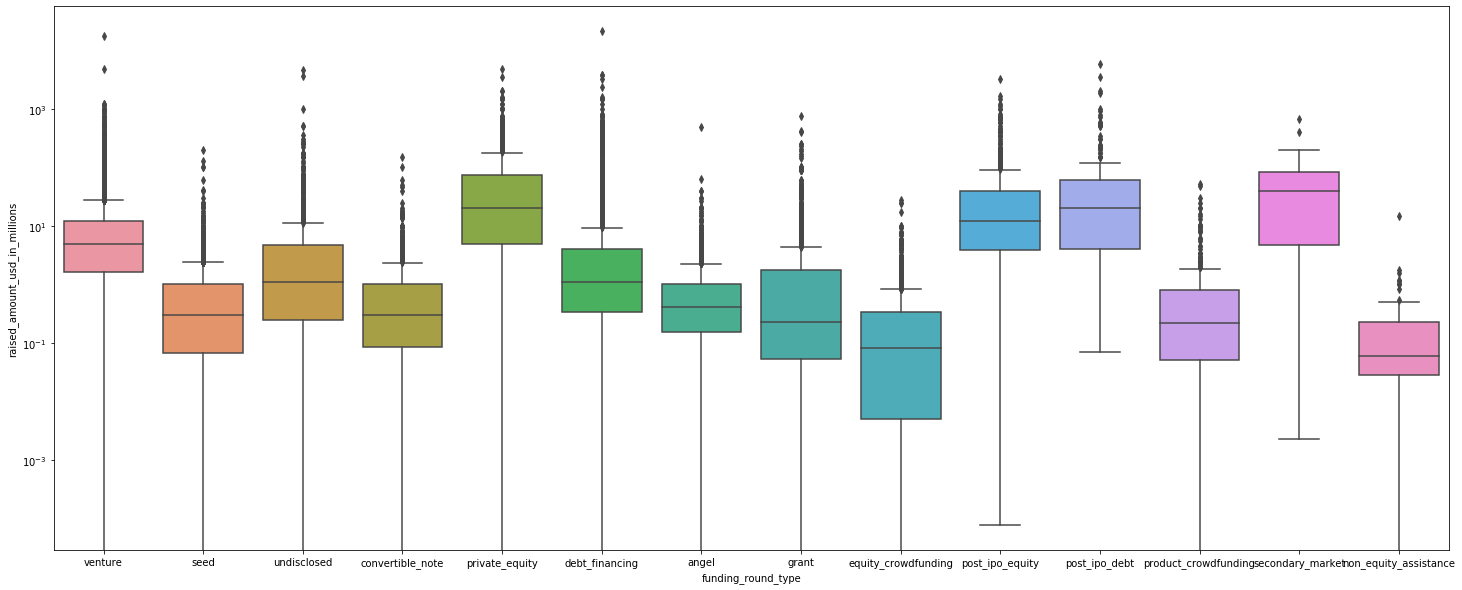

In [57]:
plt.figure(figsize=(25, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd_in_millions', data=original_data)
plt.yscale('log')
plt.show()

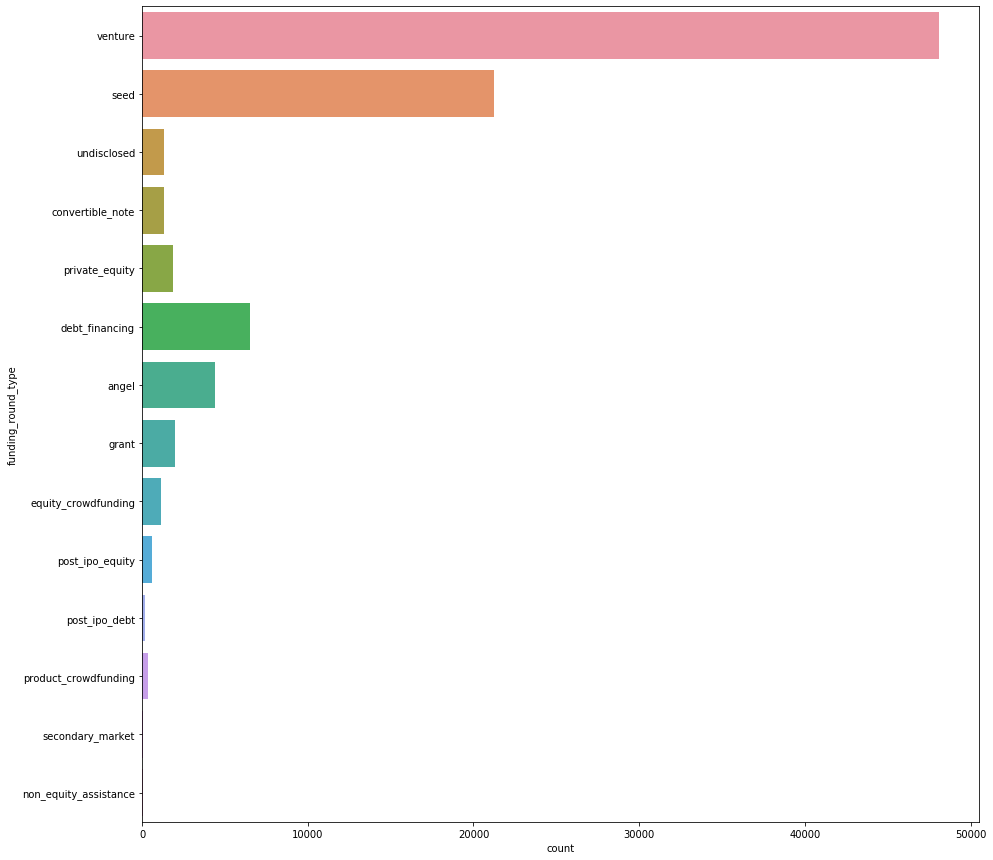

In [58]:
plt.figure(figsize=(15, 15))
sns.countplot(y="funding_round_type", data=original_data)
plt.show()

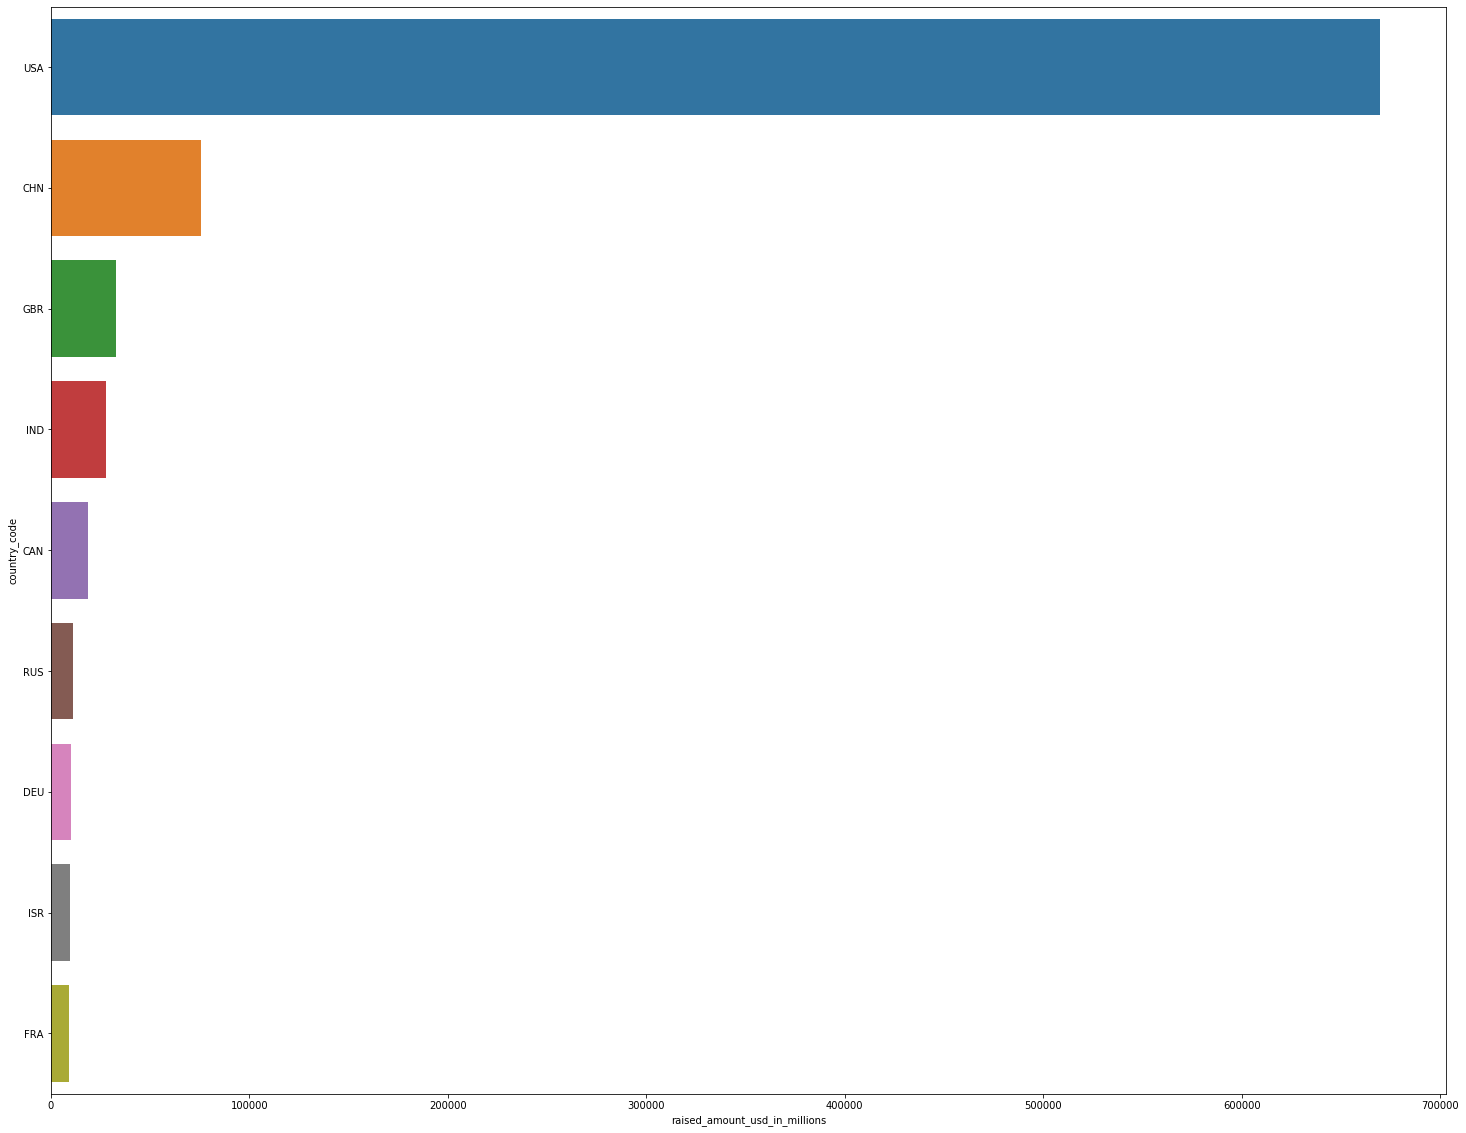

In [59]:
plt.figure(figsize=(25, 20))
barplot = sns.barplot(y='country_code', x='raised_amount_usd_in_millions', data=original_data[original_data["country_code"].isin(top9["country_code"])], estimator=np.sum, order=top9["country_code"], ci=None)


###### A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

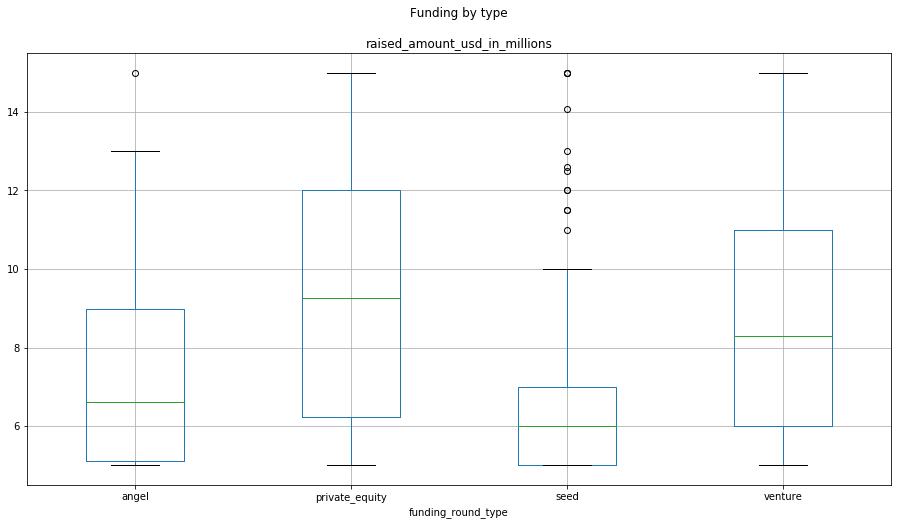

In [60]:
fig, ax = plt.subplots(figsize=(15,8))
original_data[original_data["funding_round_type"].isin(["venture", "angel", "seed", "private_equity"]) & (original_data["raised_amount_usd_in_millions"] >= 5.0) & (original_data["raised_amount_usd_in_millions"] <= 15.0)].boxplot(column="raised_amount_usd_in_millions", by="funding_round_type", ax=ax)

plt.suptitle('Funding by type')

plt.show()

From the plot above we can see that the representative value or median of the venture funding type is very close to the mid-value of the amount that Spark Funds is looking to invest

###### A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

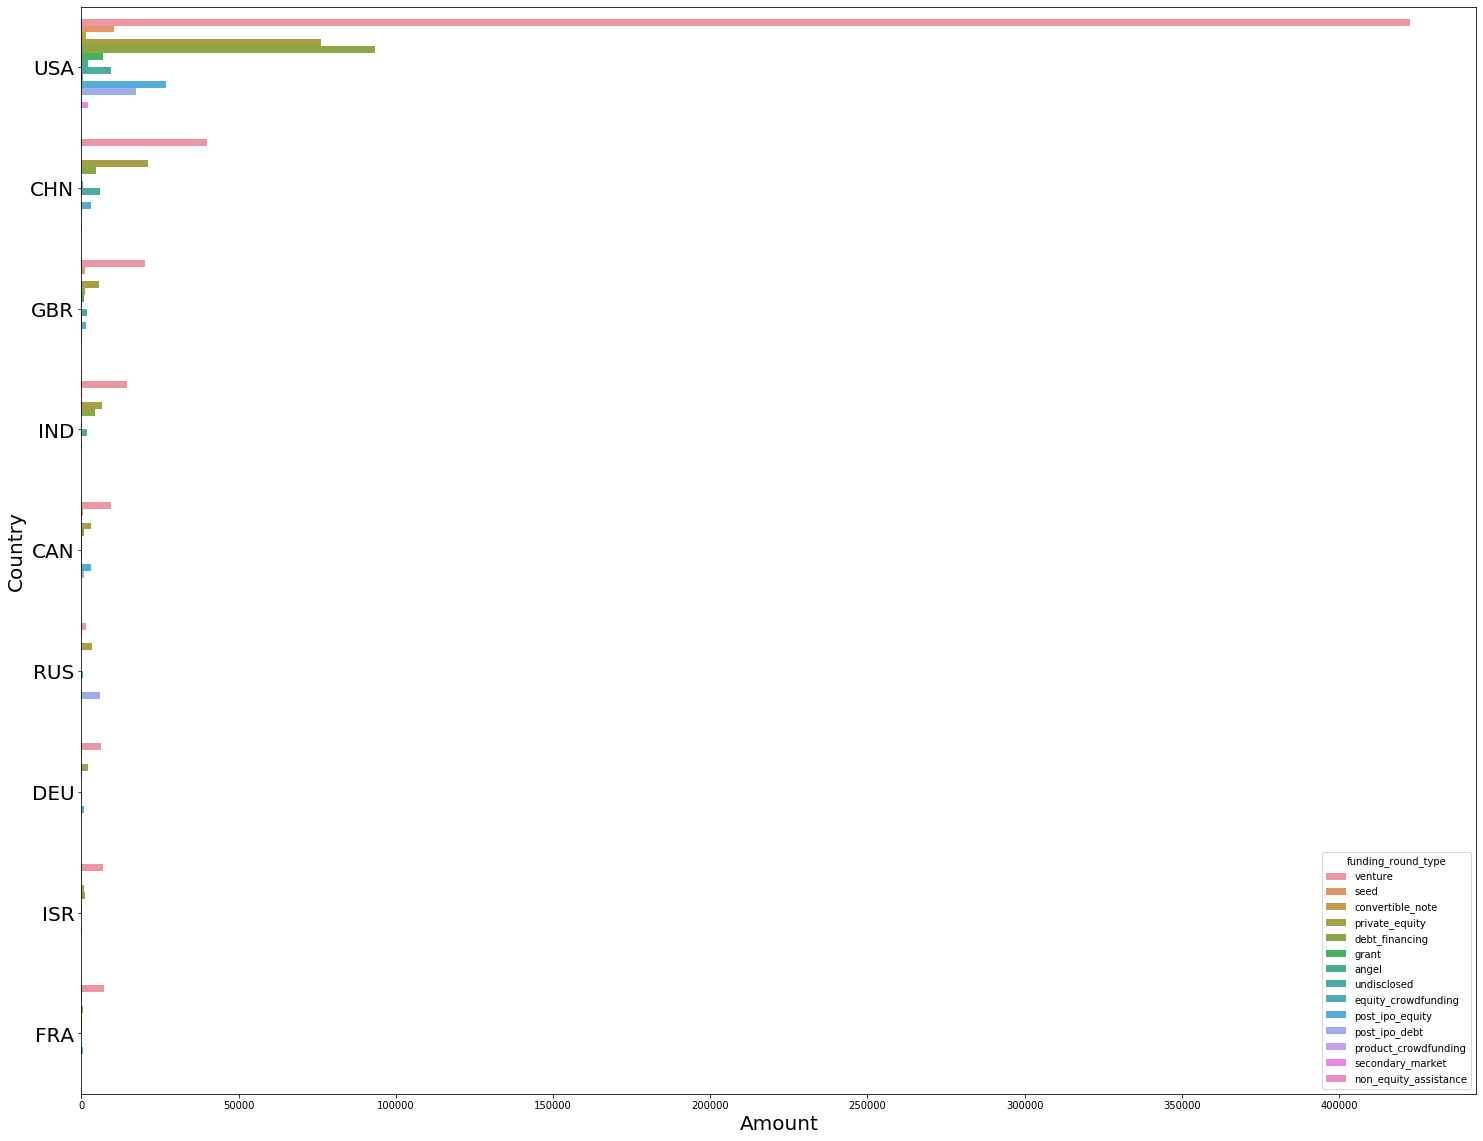

In [61]:
plt.figure(figsize=(25, 20))
barplot = sns.barplot(y='country_code', x='raised_amount_usd_in_millions', hue="funding_round_type", data=original_data[original_data["country_code"].isin(top9["country_code"])], estimator=np.sum, order=top9["country_code"], ci=None)

plt.xlabel("Amount", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
barplot.set_yticklabels(top9["country_code"], size = 20)

plt.show()

###### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [62]:
D1.groupby(by="main_sector").count().sort_values(by="funding_round_permalink", ascending=False)


,permalink,name,category_list,country_code,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd_in_millions,primary_sector
main_sector,,,,,,,,,
Others,8310,8310,8310,8310,8310,8310,8310,8310,8310
Cleantech / Semiconductors,7857,7857,7857,7857,7857,7857,7857,7857,7857
"Social, Finance, Analytics, Advertising",7246,7246,7246,7246,7246,7246,7246,7246,7246
"News, Search and Messaging",4350,4350,4350,4350,4350,4350,4350,4350,4350
Health,3269,3269,3269,3269,3269,3269,3269,3269,3269
Manufacturing,2453,2453,2453,2453,2453,2453,2453,2453,2453
Entertainment,1794,1794,1794,1794,1794,1794,1794,1794,1794
Automotive & Sports,505,505,505,505,505,505,505,505,505
Blanks,196,196,0,196,196,196,196,196,196


In [63]:
D1_top3 = D1.groupby(by="main_sector").count()\
    .sort_values(by="funding_round_permalink", ascending=False)["funding_round_permalink"]\
    .iloc[0:3].reset_index()["main_sector"]
D2_top3 = D2.groupby(by="main_sector").count()\
    .sort_values(by="funding_round_permalink", ascending=False)["funding_round_permalink"]\
    .iloc[0:3].reset_index()["main_sector"]
D3_top3 = D3.groupby(by="main_sector").count()\
    .sort_values(by="funding_round_permalink", ascending=False)["funding_round_permalink"]\
    .iloc[0:3].reset_index()["main_sector"]

In [64]:
D1_3 = D1[D1["main_sector"].isin(D1_top3)]
D2_3 = D2[D2["main_sector"].isin(D2_top3)]
D3_3 = D3[D3["main_sector"].isin(D3_top3)]

In [65]:
D = D1_3.append(D2_3).append(D3_3)

pt = pd.pivot_table(D, index =["main_sector"], columns=["country_code"], values=["raised_amount_usd_in_millions"])
pt

raised_amount_usd_in_millions  \
country_code                                                      GBR   
main_sector                                                             
Cleantech / Semiconductors                                  11.562585   
News, Search and Messaging                                        NaN   
Others                                                       8.705852   
Social, Finance, Analytics, Advertising                      8.962776   

                                                               
country_code                                   IND        USA  
main_sector                                                    
Cleantech / Semiconductors                     NaN  15.124713  
News, Search and Messaging               13.381384        NaN  
Others                                   22.286998   9.963517  
Social, Finance, Analytics, Advertising  10.740170  11.914353

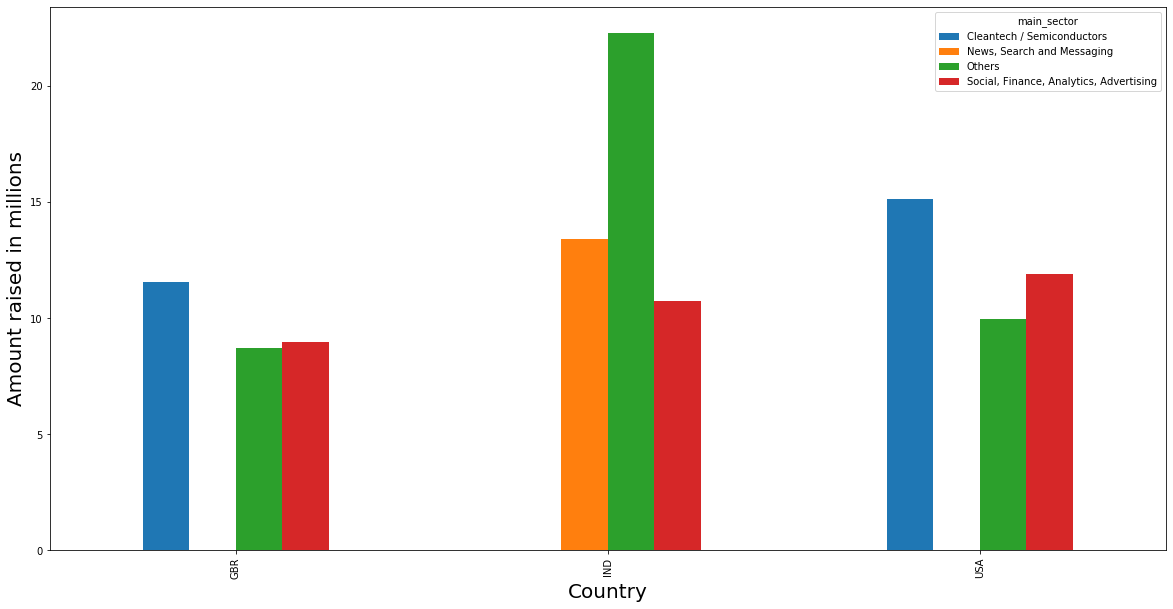

In [66]:
#plt.figure(figsize=(10, 15))
rcParams['figure.figsize'] = 20, 10
plot = pt.T.plot(kind="bar")
plt.ylabel("Amount raised in millions", fontsize = 20)
plt.xlabel("Country", fontsize = 20)
plot.set_xticklabels(["GBR","IND","USA",])
plt.show()